# Object detection

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 12.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 79.2MB/s]


## General pipeline

![](https://github.com/oseledets/dl2023/blob/main/seminars/seminar-5/doge.png?raw=1)

## Bounding boxes for each cell

![](https://github.com/oseledets/dl2023/blob/main/seminars/seminar-5/boxes.jpeg?raw=1)

## How to define default boxes:

*   Manually (user make it by hands)
*   From train dataset (clusterise training boxes and take most popular)




## Standard output per cell

![](https://github.com/oseledets/dl2023/blob/main/seminars/seminar-5/yolo.png?raw=1)

## Real life case

![](https://github.com/oseledets/dl2023/blob/main/seminars/seminar-5/real_life_yolo.jpeg?raw=1)

## Correction prediction

![](https://github.com/oseledets/dl2023/blob/main/seminars/seminar-5/correction_prediction.jpeg?raw=1)

## How to choose optimal box

![](https://github.com/oseledets/dl2023/blob/main/seminars/seminar-5/optimal_box.png?raw=1)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from PIL import Image
!wget -nv "https://www.learnopencv.com/wp-content/uploads/2021/01/person-segmentation.jpeg"

2023-04-04 12:10:53 URL:http://learnopencv.com/wp-content/uploads/2021/01/person-segmentation.jpeg [95431/95431] -> "person-segmentation.jpeg" [1]


(-0.5, 1534.5, 1023.5, -0.5)

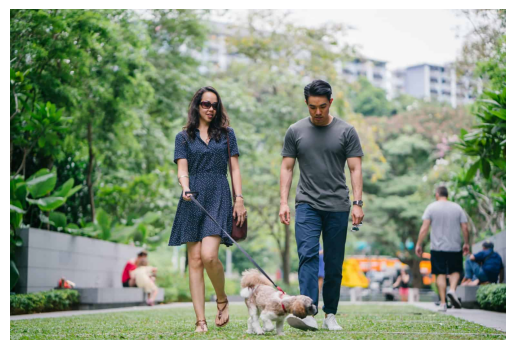

In [12]:
img = Image.open("/content/person-segmentation.jpeg")
plt.imshow(img)
plt.axis("off")

In [13]:
results = model('/content/person-segmentation.jpeg')


image 1/1 /content/person-segmentation.jpeg: 448x640 5 persons, 1 dog, 340.7ms
Speed: 6.9ms preprocess, 340.7ms inference, 32.9ms postprocess per image at shape (1, 3, 640, 640)


In [14]:
names = results[0].names

In [15]:
labels = results[0].boxes.cls
labels_name = [names[label.item()] for label in labels]
labels_name

['person', 'person', 'person', 'dog', 'person', 'person']

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

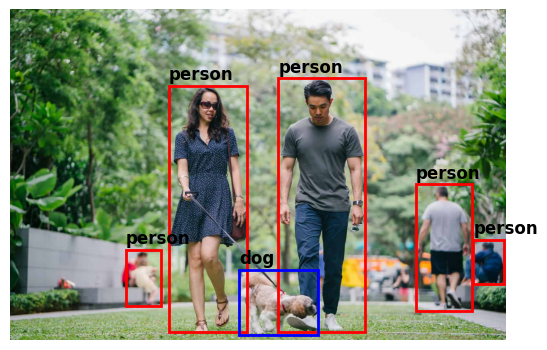

In [17]:
fig, ax = plt.subplots()
ax.imshow(img)
for label_name, box in zip(labels_name, results[0].boxes.xywh):
  x, y, w, h = box
  x = x - w/2
  y = y - h/2
  c = "r" if label_name == "person" else "b"
  rect = plt.Rectangle((x, y), width=w, height=h, linewidth=2, edgecolor=c, facecolor='none')
  ax.add_patch(rect)
for label_name, box in zip(labels_name, results[0].boxes.xywh):
  x, y, w, h = box
  x = x - w/2
  y = y - h/2 - 20
  plt.text(x, y, label_name, fontsize=12, fontweight="bold")
plt.axis("off")
plt.show()